In [1]:
def LILAramp(t,E0,Ec,Di,Dc,tf):

    return (E0*Dc*t+Ec*Di*(tf-t))/(E0*t+Ec*(tf-t))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

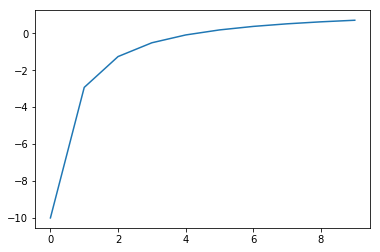

In [3]:
t = np.linspace(0,9,10);
plt.plot(t,LILAramp(t,10,0.3,-10,1.1,20))

In [29]:
def DiLILA(t, t_len, dinit,gapinit, gapcrit, gapfin, dcrit, dfin, tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit* (tinflect - t)
    denomstep1 = gapinit* t + gapcrit* (tinflect - t)
    numstep2 = gapfin* dcrit* (t_len-t) + gapcrit* dfin* (t-tinflect);
    denomstep2 = gapfin* (t_len-t) + gapcrit* (t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/ denomstep2
    else:
        out = numstep1/ denomstep1
    return out

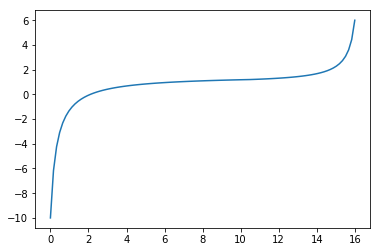

In [30]:
t = np.linspace(0,16,100);
y = []
for x in t:
    y.append(DiLILA(x,16,-10,10,0.3,4.8,1.2,6,10.5))
plt.plot(t,y)

In [43]:
def TestDiLILA(t, t_len, dinit,gapinit, gapcrit, gapfin, dcrit, dfin, tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit* (tinflect - t)
    denomstep1 = gapinit* t + gapcrit* (tinflect - t)
    numstep2 = gapfin* dcrit* (t_len-t) + gapcrit* dfin* (t-tinflect);
    denomstep2 = gapfin* (t_len-t) + gapcrit* (t-tinflect)
    out=numstep1/denomstep1
#     print(out[t>t_len].shape)
#     print(out[t<t_len and t>tinflect].shape)
#     print(numstep2[t<t_len and t>tinflect].shape)
    out[t>t_len]=dfin    
    idx=np.logical_and(t<t_len ,t>tinflect)    
    out[idx]=numstep2[idx]/denomstep2[idx]
    #out[t>t_len]=dfin
    #out[t<t_len and t>tinflect]=numstep2[t<t_len and t>tinflect]/denomstep2[t<t_len and t>tinflect]
    return out

In [44]:
TestDiLILA(t,16,-10,10,0.3,4.8,1.2,6,10.5)

array([-1.00000000e+01, -6.16315170e+00, -4.24025713e+00, -3.08508586e+00,
       -2.31437302e+00, -1.76357035e+00, -1.35030771e+00, -1.02878598e+00,
       -7.71508578e-01, -5.60969186e-01, -3.85492395e-01, -2.36992645e-01,
       -1.09692998e-01,  6.43928824e-04,  9.71967883e-02,  1.82396727e-01,
        2.58134917e-01,  3.25904584e-01,  3.86900449e-01,  4.42089767e-01,
        4.92264005e-01,  5.38077036e-01,  5.80073801e-01,  6.18712079e-01,
        6.54379250e-01,  6.87405322e-01,  7.18073176e-01,  7.46626687e-01,
        7.73277223e-01,  7.98208887e-01,  8.21582777e-01,  8.43540469e-01,
        8.64206887e-01,  8.83692681e-01,  9.02096213e-01,  9.19505210e-01,
        9.35998169e-01,  9.51645538e-01,  9.66510722e-01,  9.80650939e-01,
        9.94117963e-01,  1.00695875e+00,  1.01921599e+00,  1.03092857e+00,
        1.04213202e+00,  1.05285882e+00,  1.06313875e+00,  1.07299918e+00,
        1.08246526e+00,  1.09156019e+00,  1.10030538e+00,  1.10872062e+00,
        1.11682424e+00,  